<a href="https://colab.research.google.com/github/costprot/Detection_of_fake_news/blob/main/FAKENEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn import metrics
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
import string
import time
import pickle
import random

Α) Data

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
news = pd.read_csv("train.csv")
news = news.fillna('')
news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news.shape

(20800, 5)

In [ ]:
testnews = pd.read_csv("test.csv")
testnews = testnews.fillna('')
testnews.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
testnews.shape

(5200, 4)

In [ ]:
submitnews = pd.read_csv("submit.csv")
submitnews = submitnews.fillna('')
submitnews.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [ ]:
submitnews.shape

(5200, 2)

In [ ]:
news['content'] = news['text']
testnews['content'] = testnews['text']

In [ ]:
news.to_csv(r'news.csv', index = False)
testnews.to_csv(r'testnews.csv', index = False)

#Stemming the Data

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):    
    review = re.sub('[^a-zA-Z]',' ',content)
    regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    review = re.sub(regex, ' ', str(review).lower()).strip()
    review = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '',review, flags=re.MULTILINE)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [ ]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
news['content'] = news['content'].apply(stemming)

In [ ]:
testnews['content'] = testnews['content'].apply(stemming)

In [ ]:
X_TRAIN = news['content'].values
Y_TRAIN = news['label'].values

In [ ]:
X_TEST = testnews['content'].values
Y_TEST = submitnews['label'].values

Vectorize

In [ ]:
type(news['content'])

pandas.core.series.Series

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_TRAIN)
TF_X_TRAIN = vectorizer.transform(X_TRAIN)
TF_X_TEST = vectorizer.transform(X_TEST)

In [ ]:
allWords = vectorizer.get_feature_names()

Β) Model trainning and C) Evaluation of regressor

Logistic Regression

--- 2.2171072959899902 seconds ---
Accuracy score of the training data (Logistic Regression):  0.9709615384615384
Accuracy score of the testing data :  0.6371153846153846
Confusion matrix, without normalization


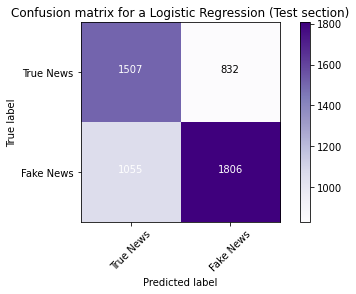

In [ ]:
start_time = time.time()
model_lr = LogisticRegression(max_iter=1000,solver='saga')
model_lr.fit(TF_X_TRAIN, Y_TRAIN)
print("--- %s seconds ---" % (time.time() - start_time))


filename = 'model_lr.sav'
pickle.dump(model_lr, open(filename, 'wb'))


X_train_prediction = model_lr.predict(TF_X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction, Y_TRAIN)
print('Accuracy score of the training data (Logistic Regression): ', training_data_accuracy)
X_test_prediction = model_lr.predict(TF_X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction, Y_TEST)
print('Accuracy score of the testing data : ', test_data_accuracy)
cm_lr = metrics.confusion_matrix(Y_TEST, X_test_prediction, labels=[0,1])
plot_confusion_matrix(cm_lr, classes=['True News','Fake News'], title ='Confusion matrix for a Logistic Regression (Test section)')

SVC

--- 0.9076368808746338 seconds ---
Accuracy score of the training data (Logistic Regression):  0.998125
Accuracy score of the testing data :  0.6365384615384615
Confusion matrix, without normalization


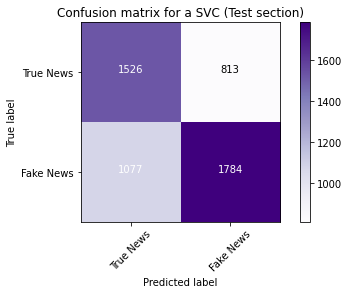

In [ ]:
start_time = time.time()
model_svc = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)#LinearSVC()
model_svc.fit(TF_X_TRAIN, Y_TRAIN)
print("--- %s seconds ---" % (time.time() - start_time))

filename = 'model_svc.sav'
pickle.dump(model_svc, open(filename, 'wb'))

X_train_prediction = model_svc.predict(TF_X_TRAIN)
training_data_accuracy = accuracy_score(X_train_prediction, Y_TRAIN)
print('Accuracy score of the training data (Logistic Regression): ', training_data_accuracy)
X_test_prediction = model_svc.predict(TF_X_TEST)
test_data_accuracy = accuracy_score(X_test_prediction, Y_TEST)
print('Accuracy score of the testing data : ', test_data_accuracy)
cm_svc = metrics.confusion_matrix(Y_TEST, X_test_prediction, labels=[0,1])
plot_confusion_matrix(cm_svc, classes=['True News','Fake News'], title ='Confusion matrix for a SVC (Test section)')

D) Application Development

In [ ]:
def createVector(txt):
    s = stemming(txt)
    myList = [s]
    X_TEST = vectorizer.transform(myList)
    return X_TEST

def predictApplication(txt, model1file, model2file):
    AppPrediction = []
    model1 = pickle.load(open(model1file, 'rb'))
    model2 = pickle.load(open(model2file, 'rb'))
    myVector = createVector(txt)
    y1 = model1.predict(myVector)
    y2 = model2.predict(myVector)
    return(y1, y2)


In [ ]:
#USE
#predictApplication(text, folder that contains the 1st model, folder that contains the 2nd model)
#test for the texts with IDs 20-70 in the train test
Results = []
for e in range(20,80):
    predictions = predictApplication(testnews.loc[e, 'text'], "model_lr.sav", "model_svc.sav")
    Results.append((predictions[0][0],predictions[1][0], submitnews.loc[e, 'label']))

In [ ]:
#results
correct1 = 0
correct2 = 0
for r in Results:
    if r[0] == r[2]:
        correct1 = correct1 + 1
    if r[1] == r[2]:
        correct2 = correct2 + 1
print(correct1/len(Results))
print(correct2/len(Results))
        

0.6666666666666666
0.6833333333333333


In [ ]:
#prediction for the 2nd text of the train set
prediction = predictApplication(news.loc[2,'content'], "model_lr.sav", "model_svc.sav")

In [ ]:
#prediction
prediction

(array([1], dtype=int64), array([1], dtype=int64))

Ε) Analysis and extraction of correlation with the construction of functions

In [ ]:
'''
l: To Label του κειμένου (0, 1 ή -1 σε απουσία του)
item: Η λέξη που εξετάζεται
dataset: το σύνολο των κειμένων
labels: Οι χαρακτηρισμοί των κειμένων ([] αν δεν διατίθεται)

Στις παρακάτω συναρτήσεις αναζητειται η συσχέτιση
item --> l
'''
def Support(l, item, dataset, labels=[]):
    count = 0
    item = port_stem.stem(item.lower())
    for i in range(0,len(dataset)):
        r = dataset[i].split()
        if item in r:
            if l==-1:
                count = count + 1
            else:
                if labels[i]==l:
                    count = count + 1

    return count/len(dataset)
def SupportLabel(l, labels):
    count = 0
    for i in range(0,len(labels)):
        if (labels[i]==l):
            count = count + 1
    return count/len(labels)
    

In [ ]:
def Confidence(l, item, dataset, labels):
    if (Support(-1,item, dataset, [])==0):
        return 0
    return Support(l,item, dataset, labels)/Support(-1,item, dataset, [])

In [ ]:
def Lift(l, item, dataset, labels):
    if (Support(-1,item, dataset, [])==0):
        return 0
    return Confidence(l,item, dataset, labels)/Support(-1,item, dataset, [])

In [ ]:
def Leverage(l, item, dataset, labels):
    return (Support(l, item, dataset, labels)-Support(-1, item, dataset, [])*SupportLabel(l,  labels))

In [ ]:
#Trials with 90 random expressions from the texts
wordsStatsFor1 = []
for c in range(0,90):
    e = random.choice(allWords)
    d = {"Word":e, 
     "Support":Support(-1, e, news['content'], []) , 
     "Confidence" : Confidence(1, e, news['content'], news['label']) ,
     "Lift" : Lift(1, e, news['content'], news['label']) ,
     "Leverage" : Leverage(1, e, news['content'], news['label'])
    }
    wordsStatsFor1.append(d)


[{'Word': 'pmu',
  'Support': 9.615384615384615e-05,
  'Confidence': 0.5,
  'Lift': 5200.0,
  'Leverage': -6.009615384615244e-08},
 {'Word': 'zamili',
  'Support': 4.807692307692308e-05,
  'Confidence': 0.0,
  'Lift': 0.0,
  'Leverage': -2.4068509615384615e-05},
 {'Word': 'ormai',
  'Support': 4.807692307692308e-05,
  'Confidence': 1.0,
  'Lift': 20800.0,
  'Leverage': 2.4008413461538462e-05},
 {'Word': 'hedefimiz',
  'Support': 4.807692307692308e-05,
  'Confidence': 1.0,
  'Lift': 20800.0,
  'Leverage': 2.4008413461538462e-05},
 {'Word': 'lightheart',
  'Support': 0.0011057692307692307,
  'Confidence': 0.04347826086956522,
  'Lift': 39.3194706994329,
  'Leverage': -0.0005054987980769231},
 {'Word': 'qichao',
  'Support': 9.615384615384615e-05,
  'Confidence': 0.5,
  'Lift': 5200.0,
  'Leverage': -6.009615384615244e-08},
 {'Word': 'pour',
  'Support': 0.022692307692307692,
  'Confidence': 0.40889830508474573,
  'Lift': 18.01924734271761,
  'Leverage': -0.0020814903846153848},
 {'Word':

In [ ]:
for c in range(0,30):
    e = random.choice(allWords)
    d = {"Word":e, 
     "Support":Support(-1, e, news['content'], []) , 
     "Confidence" : Confidence(1, e, news['content'], news['label']) ,
     "Lift" : Lift(1, e, news['content'], news['label']) ,
     "Leverage" : Leverage(1, e, news['content'], news['label'])
    }
    wordsStatsFor1.append(d)


In [ ]:
wordMetricsdf = pd.DataFrame(wordsStatsFor1)
wordMetricsdf.sort_values(by=["Confidence","Support"], ascending=False).head(20)

,Word,Support,Confidence,Lift,Leverage
7,raum,0.000240,1.0,4160.000000,0.000120
31,militaryrussia,0.000192,1.0,5200.000000,0.000096
57,deist,0.000144,1.0,6933.333333,0.000072
27,expresament,0.000096,1.0,10400.000000,0.000048
62,wolfricht,0.000096,1.0,10400.000000,0.000048
63,voie,0.000096,1.0,10400.000000,0.000048
66,gane,0.000096,1.0,10400.000000,0.000048
75,unacount,0.000096,1.0,10400.000000,0.000048
77,bankofrussia,0.000096,1.0,10400.000000,0.000048
2,ormai,0.000048,1.0,20800.000000,0.000024
